In [1]:
%matplotlib inline 
# %matplotlib notebook to enable interactivity

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
'''
1: Featured
2: Good
3: Class B
4: Class C
5: Start
6: Stub
'''
dataset = pd.read_excel('Dataset.xlsx', index_col=None)
X = dataset.loc[:, :'#WikiLinks']
Y = pd.Series(dataset.loc[:, 'CLASS']) #Pandas Series containing the correct output class.
X.head()

,Article Age,Article Length,InfoBox,Flesch Reading Ease,Flesch Kincaid Grade Level,Smog Index,Coleman Liau Index,Automated Readability Index,Difficult Words,Dale Chall Readability,...,#Cite Templates,#Editors,#External Links,#Images,#Level 2 Headers,#Level 3 and above Headers,#Non Cite Templates,#References,#Revisions,#WikiLinks
0,130,8727,1,40.01,15.4,11.2,14.40,19.3,188,9.34,...,12,4,14,1,3,0,4,12,32,47
1,2649,5383,1,52.19,10.7,8.8,14.16,13.9,111,9.28,...,6,13,12,3,5,0,9,5,19,32
2,4441,4585,1,61.67,9.1,3.1,12.47,12.0,144,8.90,...,0,29,9,0,5,0,14,3,49,30
3,1597,3545,1,39.33,11.5,8.8,16.12,13.7,79,9.39,...,3,12,3,1,4,0,8,3,12,32
4,675,4136,1,15.31,16.6,13.0,20.25,20.1,56,11.38,...,2,7,2,0,10,2,49,3,30,12


<IPython.core.display.Javascript object>


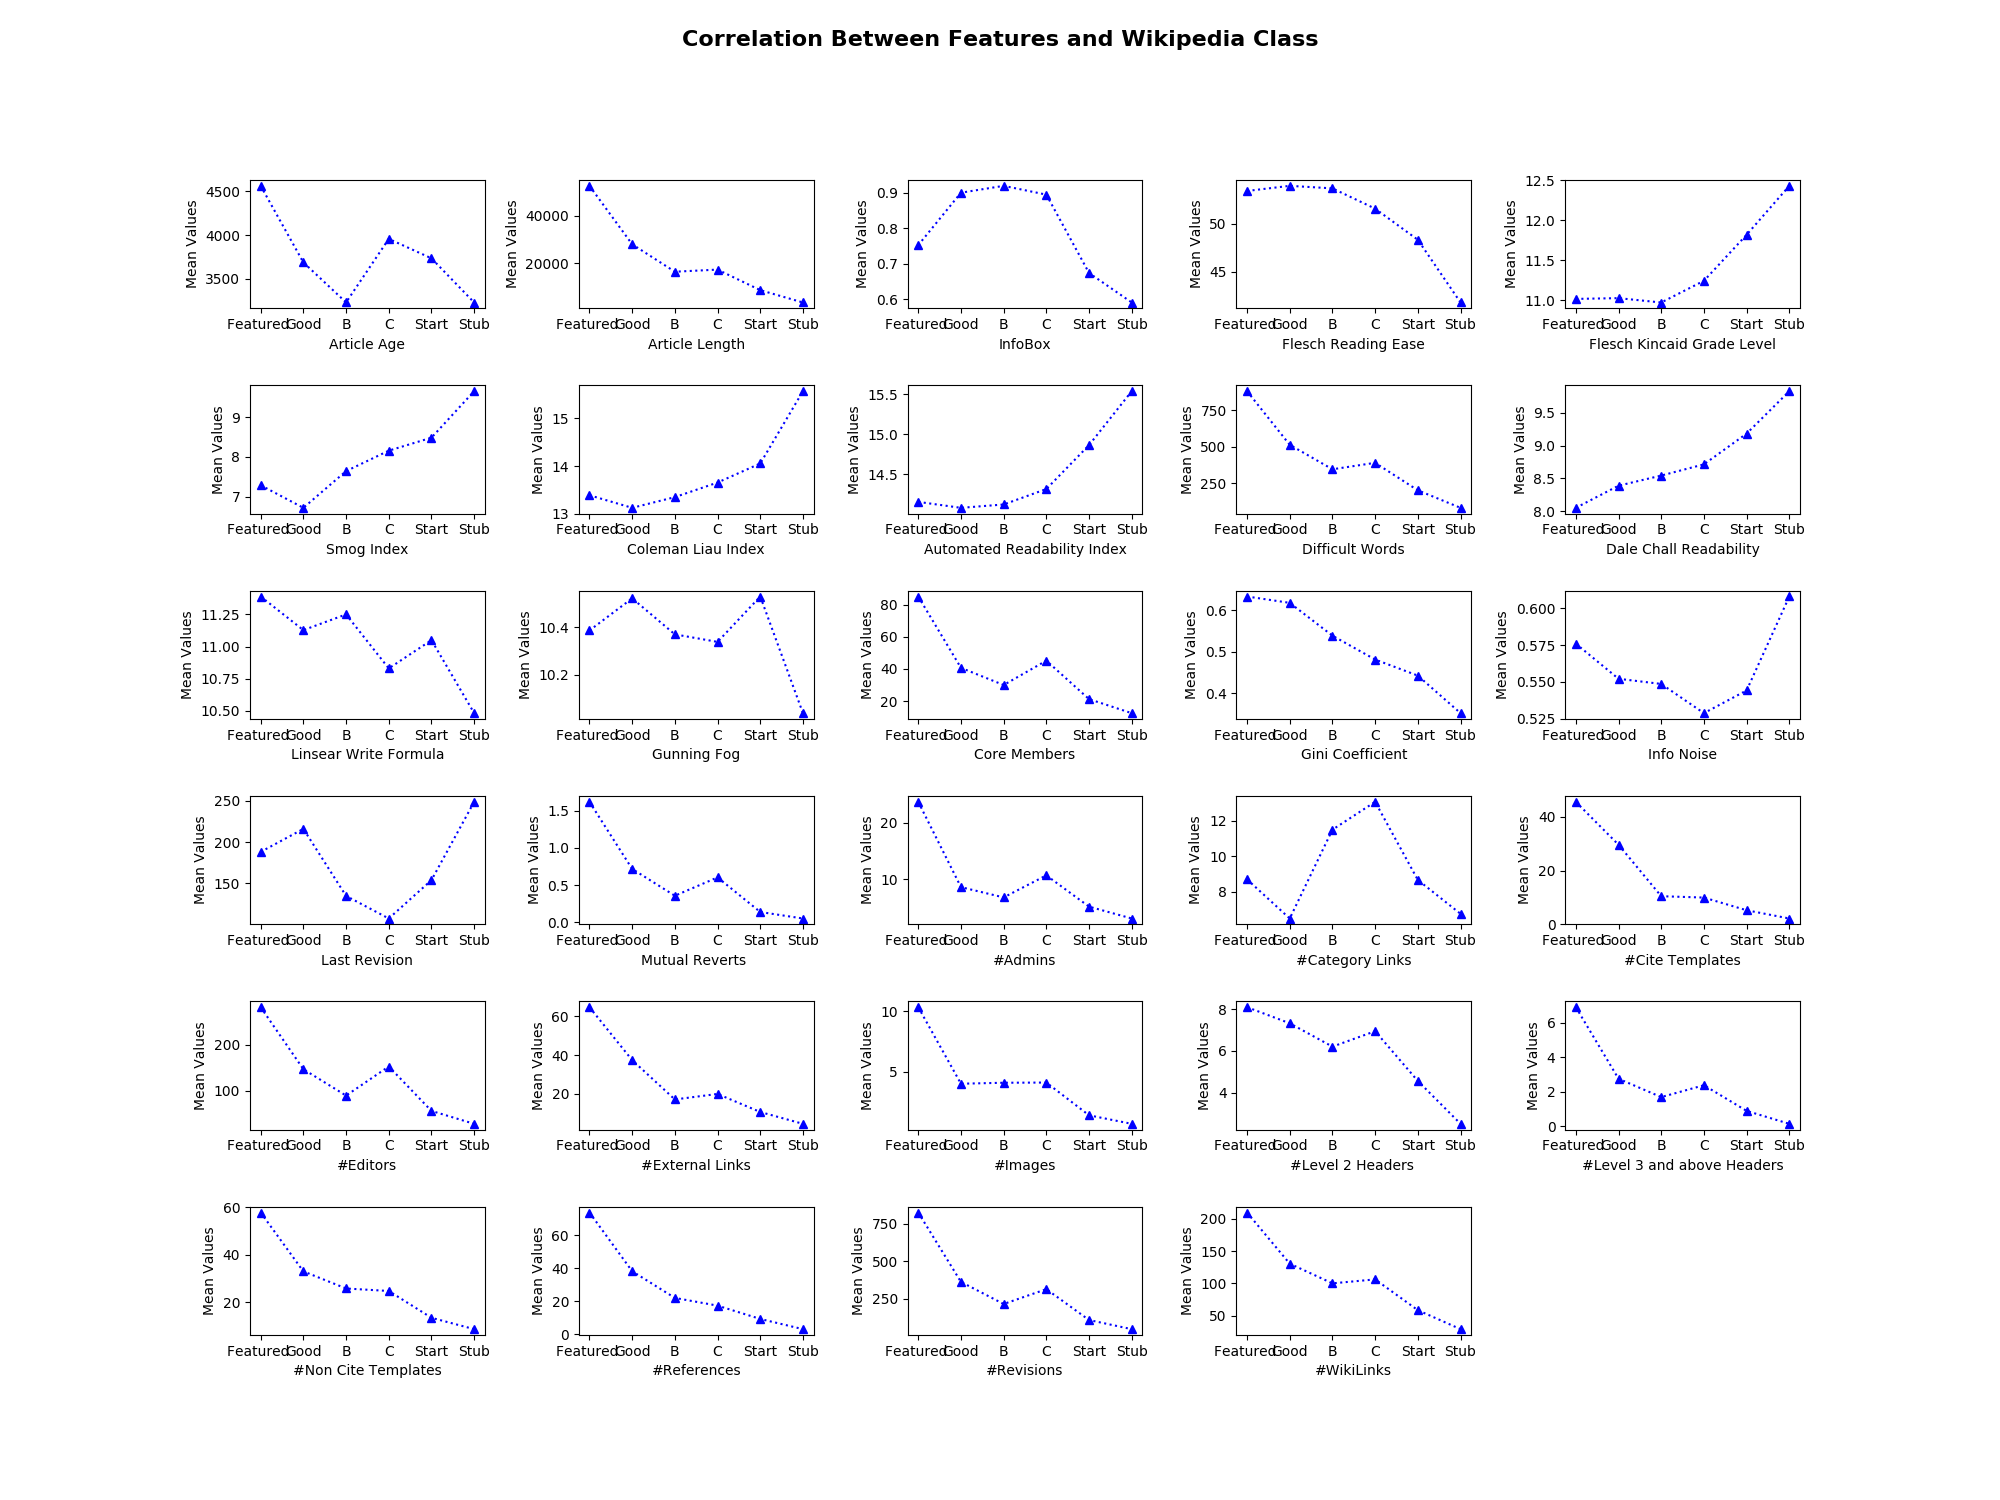

In [5]:
f, ax = plt.subplots(figsize=(20, 15))
f.subplots_adjust(hspace=0.6, wspace=0.4)

count = 1
for each in X.columns:
    x = [1, 2, 3, 4, 5, 6]
    y = []
    for i in range(1, 7):
        y.append((X[Y == i][each].mean()))
    
    plt.subplot(6, 5, count)
    plt.xticks(x, ['Featured ', 'Good', 'B', 'C', 'Start', 'Stub'])
    plt.plot(x, y, 'b^:')
    plt.xlabel(each)
    plt.ylabel('Mean Values')
    count += 1
    
t = f.suptitle('Correlation Between Features and Wikipedia Class', fontsize=16, fontweight="bold")

##### From the above plots, we can say that most of the features decrease/increase with the quality of Wikipedia article.

<IPython.core.display.Javascript object>


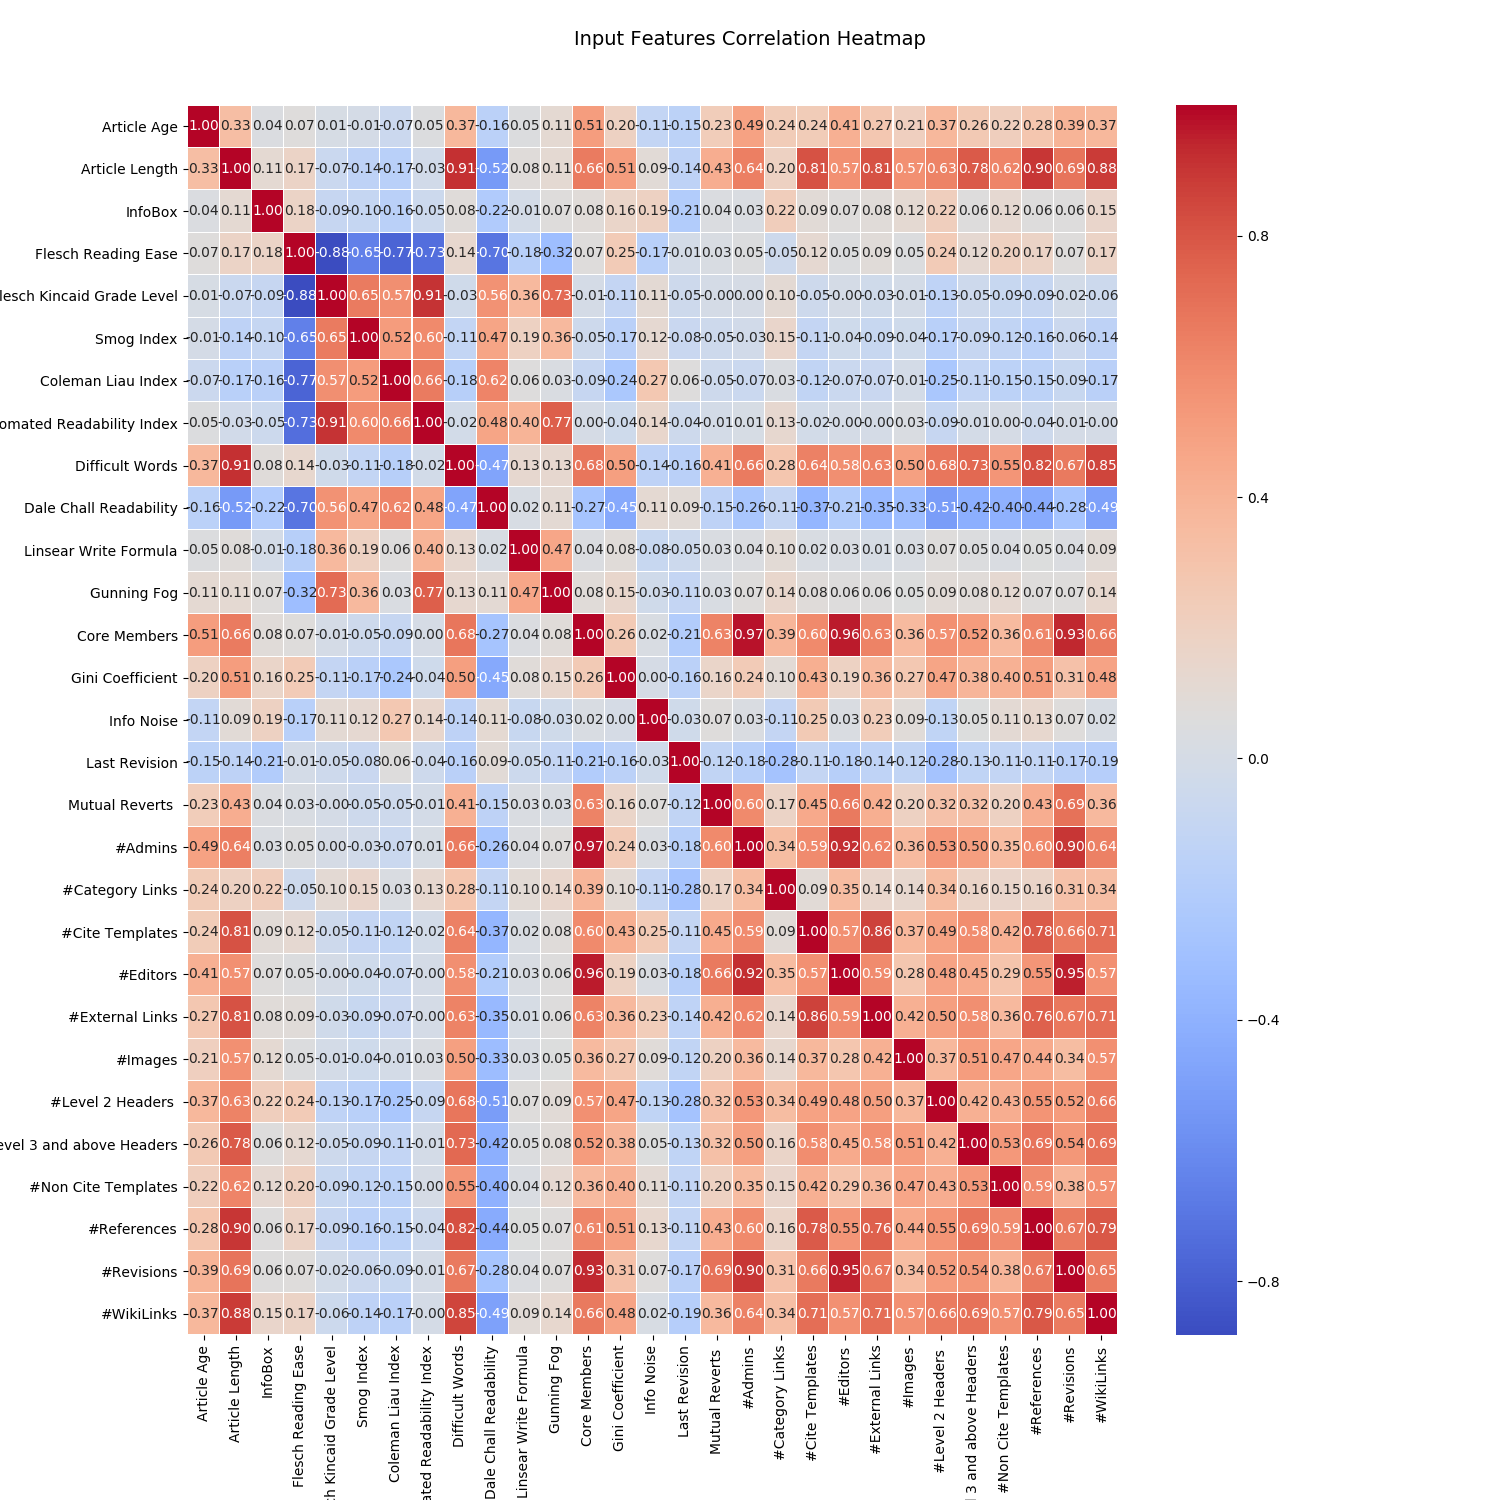

In [6]:
f, ax = plt.subplots(figsize=(15, 15))

corr = X.corr(method ='pearson')
hm = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm", fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Input Features Correlation Heatmap', fontsize=14)

##### The heatmap shows that all the Readability Features are highly correlated. Further, the counting features are also correlated. Hence, we may exclude a few of these features to reduce the dimensionality of feature vector. 

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3) 
pca.fit(X)
x_pca = pca.transform(X)

x_pca.shape

(1443, 3)

<IPython.core.display.Javascript object>


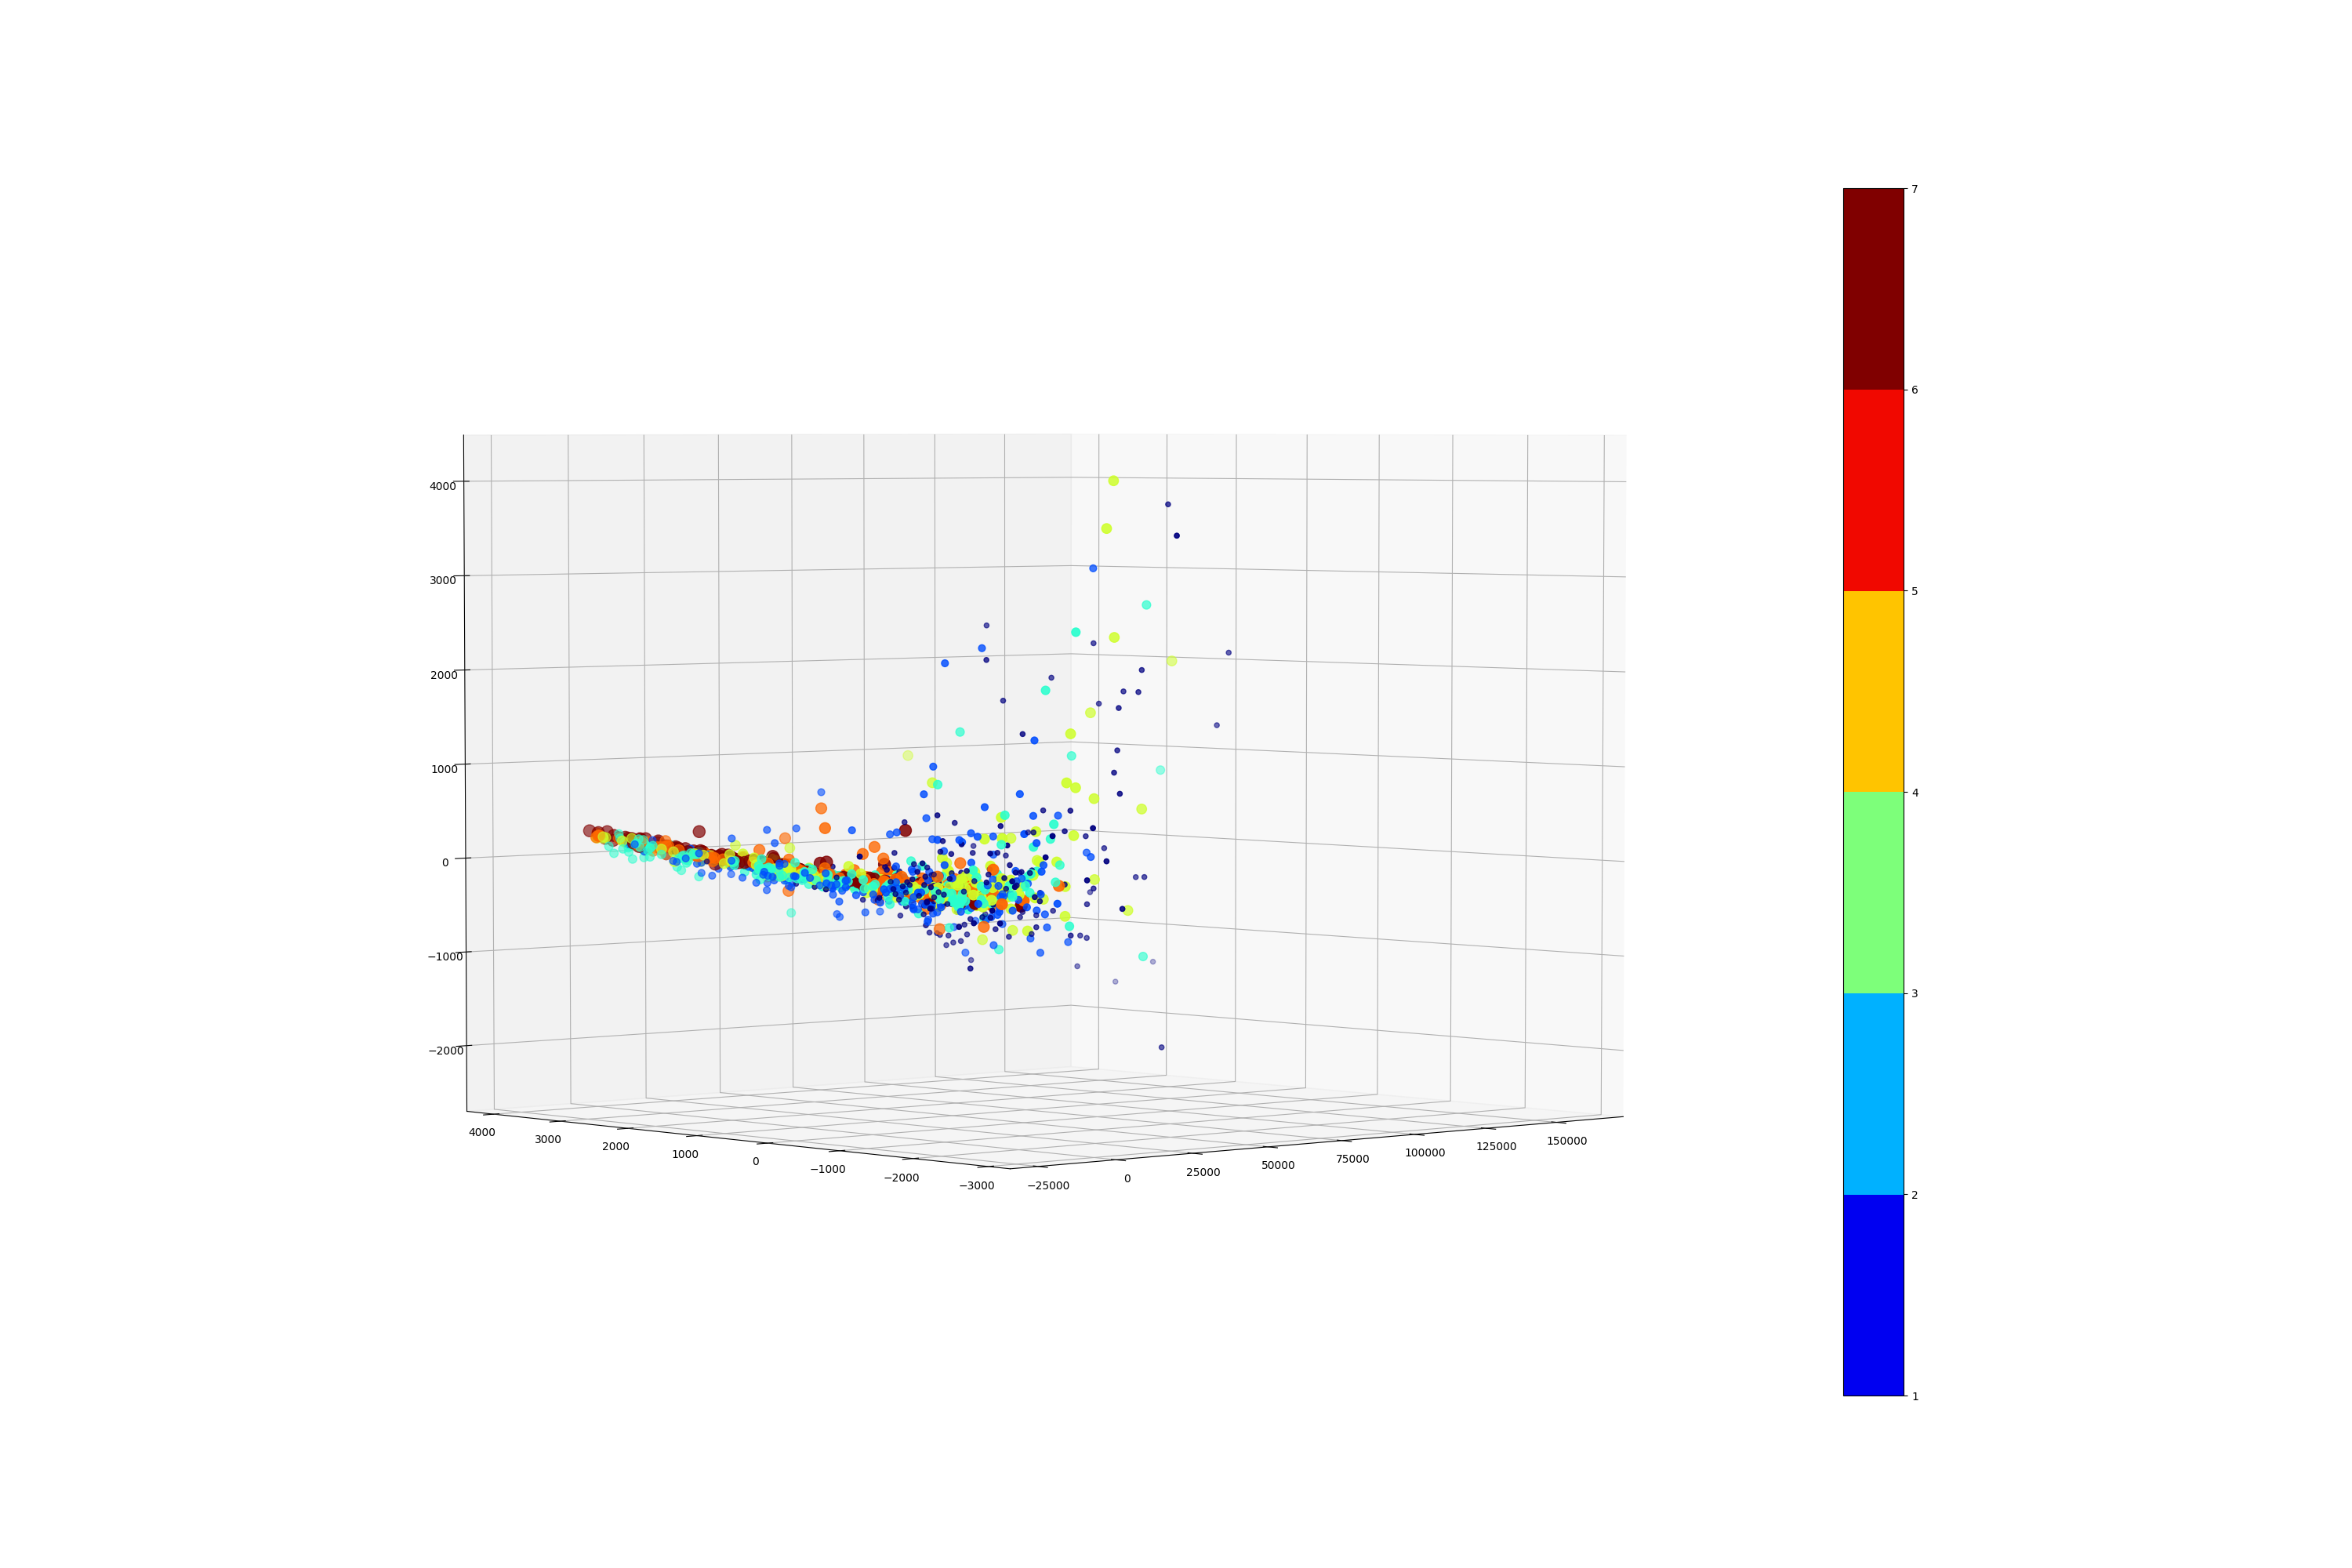

In [8]:
fig = plt.figure(figsize=(30,20))

ax = fig.add_subplot(111, projection='3d')
cmhot = plt.get_cmap("jet")
# plt.xlim(-25000, 25000) 
# plt.ylim(-3000, 5000)
cax = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=Y, s=Y*20, cmap=cmhot)

norm = mpl.colors.Normalize(vmin=1,vmax=6)
sm = plt.cm.ScalarMappable(cmap=cmhot, norm=norm)
sm.set_array([])
plt.colorbar(sm, boundaries=np.arange(1,8,1))

# ax.view_init(90,180)

plt.show()

##### Use interactive mode to rotate the figure or use figsize & xlim/ylim to zoom in to check the separability of WIkipedia Classes.